In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score

In [54]:
train_data = pd.read_csv("D:/Dataset/healthcare-dataset-stroke-data/train_2v.csv")
test_data = pd.read_csv("D:/Dataset/healthcare-dataset-stroke-data/test_2v.csv")
test_data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  36306    Male  80.0             0              0          Yes   
1  61829  Female  74.0             0              1          Yes   
2  14152  Female  14.0             0              0           No   
3  12997    Male  28.0             0              0           No   
4  40801  Female  63.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  
0        Private          Urban              83.84  21.1  formerly smoked  
1  Self-employed          Rural             179.50  26.0  formerly smoked  
2       children          Rural              95.16  21.2              NaN  
3        Private          Urban              94.76  23.4              NaN  
4       Govt_job          Rural              83.57  27.6     never smoked

In [55]:
test_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [56]:
print ('Train Data Shape: {}'.format(train_data.shape))

print ('Test Data Shape: {}'.format(test_data.shape))

Train Data Shape: (43400, 12)
Test Data Shape: (18601, 11)


In [57]:
train_data.describe()

id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.070000     32.900000      0.000000  
max           291.050000     97.600000      1.000000

In [58]:
train_data.isnull().sum()/len(train_data)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [59]:
test_data.isnull().sum()/len(test_data)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.177249
smoking_status       30.917693
dtype: float64

In [60]:
joined_data = pd.concat([train_data,test_data])

C:\Users\mkahs\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


In [61]:
print ('Joined Data Shape: {}'.format(joined_data.shape))

Joined Data Shape: (62001, 12)


In [62]:
joined_data.isnull().sum()/len(joined_data)*100

Residence_type        0.000000
age                   0.000000
avg_glucose_level     0.000000
bmi                   3.311237
ever_married          0.000000
gender                0.000000
heart_disease         0.000000
hypertension          0.000000
id                    0.000000
smoking_status       30.714021
stroke               30.001129
work_type             0.000000
dtype: float64

In [63]:
train_data["bmi"]=train_data["bmi"].fillna(train_data["bmi"].mean())

In [64]:
train_data.head()
train_data.shape

(43400, 12)

In [65]:
label = LabelEncoder()
train_data['gender'] = label.fit_transform(train_data['gender'])
train_data['ever_married'] = label.fit_transform(train_data['ever_married'])
train_data['work_type']= label.fit_transform(train_data['work_type'])
train_data['Residence_type']= label.fit_transform(train_data['Residence_type'])

In [66]:
train_data_without_smoke = train_data[train_data['smoking_status'].isnull()]
train_data_with_smoke = train_data[train_data['smoking_status'].notnull()]
print("Data without smoke status: ", train_data_without_smoke.shape)
print("Data with smoke status: ", train_data_with_smoke.shape)

Data without smoke status:  (13292, 12)
Data with smoke status:  (30108, 12)


In [67]:
train_data_without_smoke.drop(columns='smoking_status',axis=1,inplace=True)

C:\Users\mkahs\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [68]:
train_data_without_smoke.head()
train_data_without_smoke.shape


(13292, 11)

In [69]:
train_data_with_smoke.head()
train_data_with_smoke.shape

(30108, 12)

In [70]:
train_data_with_smoke['smoking_status']= label.fit_transform(train_data_with_smoke['smoking_status'])

C:\Users\mkahs\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [71]:
train_data_with_smoke.head()
train_data_with_smoke.shape

(30108, 12)

In [72]:
train_data_with_smoke.corr('pearson')

id    gender       age  hypertension  heart_disease  \
id                 1.000000  0.005445  0.000131      0.002157       0.013075   
gender             0.005445  1.000000  0.040785      0.037431       0.097549   
age                0.000131  0.040785  1.000000      0.259528       0.251819   
hypertension       0.002157  0.037431  0.259528      1.000000       0.114957   
heart_disease      0.013075  0.097549  0.251819      0.114957       1.000000   
ever_married       0.000043  0.024852  0.546996      0.133258       0.098229   
work_type          0.008955  0.010247  0.018850      0.019309       0.034466   
Residence_type    -0.000966  0.004814  0.004044     -0.004427      -0.000583   
avg_glucose_level  0.020976  0.053496  0.230682      0.154702       0.139449   
bmi                0.013226  0.019278  0.101619      0.120730       0.018562   
smoking_status     0.004082 -0.013613 -0.147968     -0.030094      -0.035660   
stroke             0.002238  0.013689  0.159838      0.073310       0.107007   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
id                     0.000043   0.008955       -0.000966           0.020976   
gender                 0.024852   0.010247        0.004814           0.053496   
age                    0.546996   0.018850        0.004044           0.230682   
hypertension           0.133258   0.019309       -0.004427           0.154702   
heart_disease          0.098229   0.034466       -0.000583           0.139449   
ever_married           1.000000  -0.067305        0.004990           0.120161   
work_type             -0.067305   1.000000       -0.010796           0.008315   
Residence_type         0.004990  -0.010796        1.000000          -0.001361   
avg_glucose_level      0.120161   0.008315       -0.001361           1.000000   
bmi                    0.139949  -0.066278       -0.002944           0.167699   
smoking_status        -0.053049  -0.030810        0.010095          -0.035164   
stroke                 0.051666   0.025708        0.002064           0.077206   

                        bmi  smoking_status    stroke  
id                 0.013226        0.004082  0.002238  
gender             0.019278       -0.013613  0.013689  
age                0.101619       -0.147968  0.159838  
hypertension       0.120730       -0.030094  0.073310  
heart_disease      0.018562       -0.035660  0.107007  
ever_married       0.139949       -0.053049  0.051666  
work_type         -0.066278       -0.030810  0.025708  
Residence_type    -0.002944        0.010095  0.002064  
avg_glucose_level  0.167699       -0.035164  0.077206  
bmi                1.000000       -0.035568 -0.006950  
smoking_status    -0.035568        1.000000 -0.023068  
stroke            -0.006950       -0.023068  1.000000

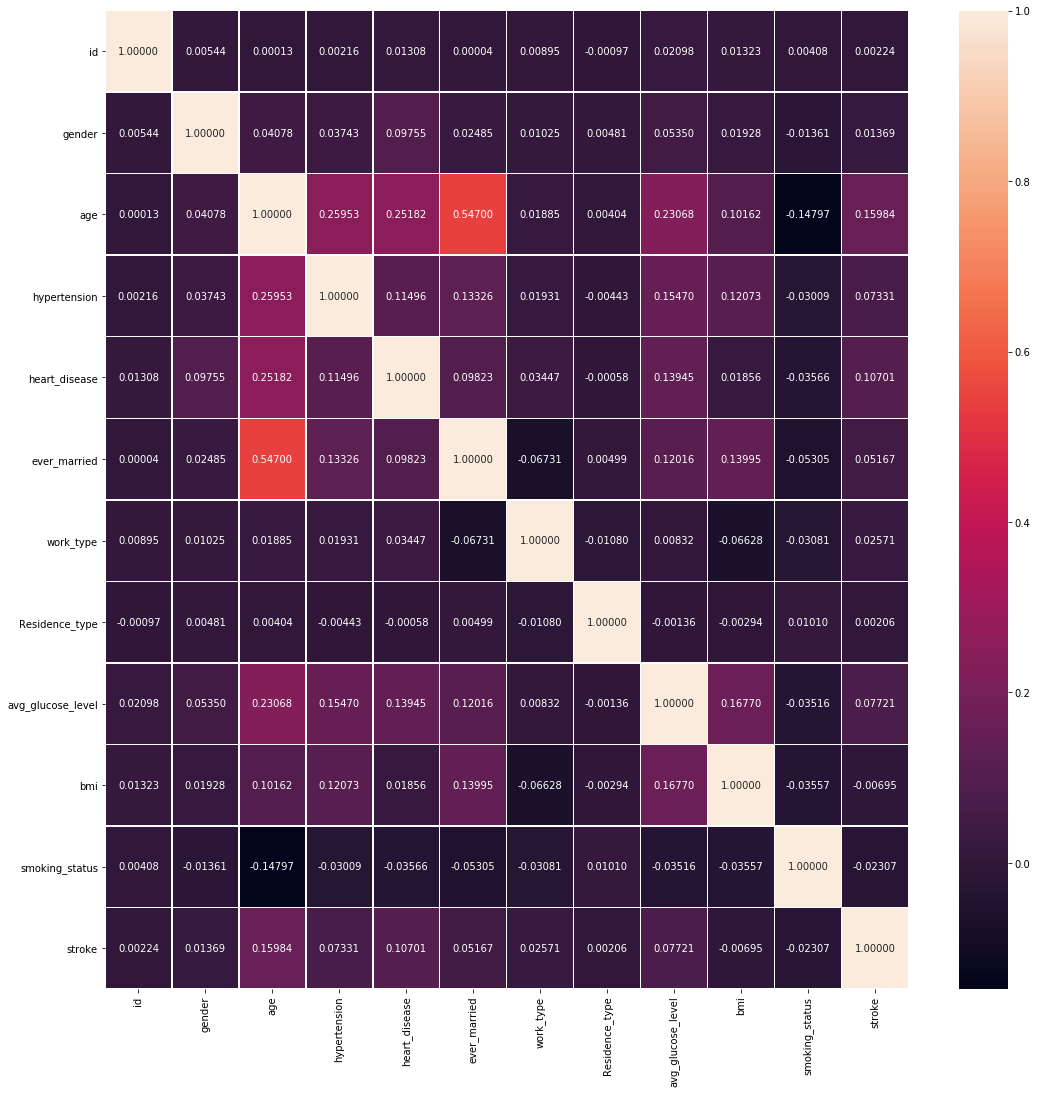

In [73]:
import seaborn as sns
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_data_with_smoke.corr('pearson'), annot=True, linewidths=.5, fmt= '.5f',ax=ax)

In [74]:
print("Data with SMOKE status:")
train_data_with_smoke['stroke'].value_counts()

Data with SMOKE status:


0    29470
1      638
Name: stroke, dtype: int64

In [75]:
print("Data without SMOKE status:")
train_data_without_smoke['stroke'].value_counts()

Data without SMOKE status:


0    13147
1      145
Name: stroke, dtype: int64

In [76]:
ros = RandomOverSampler(random_state=0)
smote = SMOTE()

In [77]:
X_resampled, y_resampled = ros.fit_resample(train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'], 
                                            train_data_with_smoke['stroke'])

In [78]:
train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi'],
      dtype='object')

In [79]:
print ('ROS Input Data Shape for Smoke Data: {}'.format(X_resampled.shape))
print ('ROS Output Data Shape for Smoke Data: {}'.format(y_resampled.shape))

ROS Input Data Shape for Smoke Data: (58940, 11)
ROS Output Data Shape for Smoke Data: (58940,)


In [80]:
X_resampled_1, y_resampled_1 = ros.fit_resample(train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'], 
                                            train_data_without_smoke['stroke'])

In [81]:
print ('ROS Input Data Shape for Non Smoke Data: {}'.format(X_resampled_1.shape))
print ('ROS Output Data Shape for Non Smoke Data: {}'.format(y_resampled_1.shape))

ROS Input Data Shape for Non Smoke Data: (26294, 10)
ROS Output Data Shape for Non Smoke Data: (26294,)


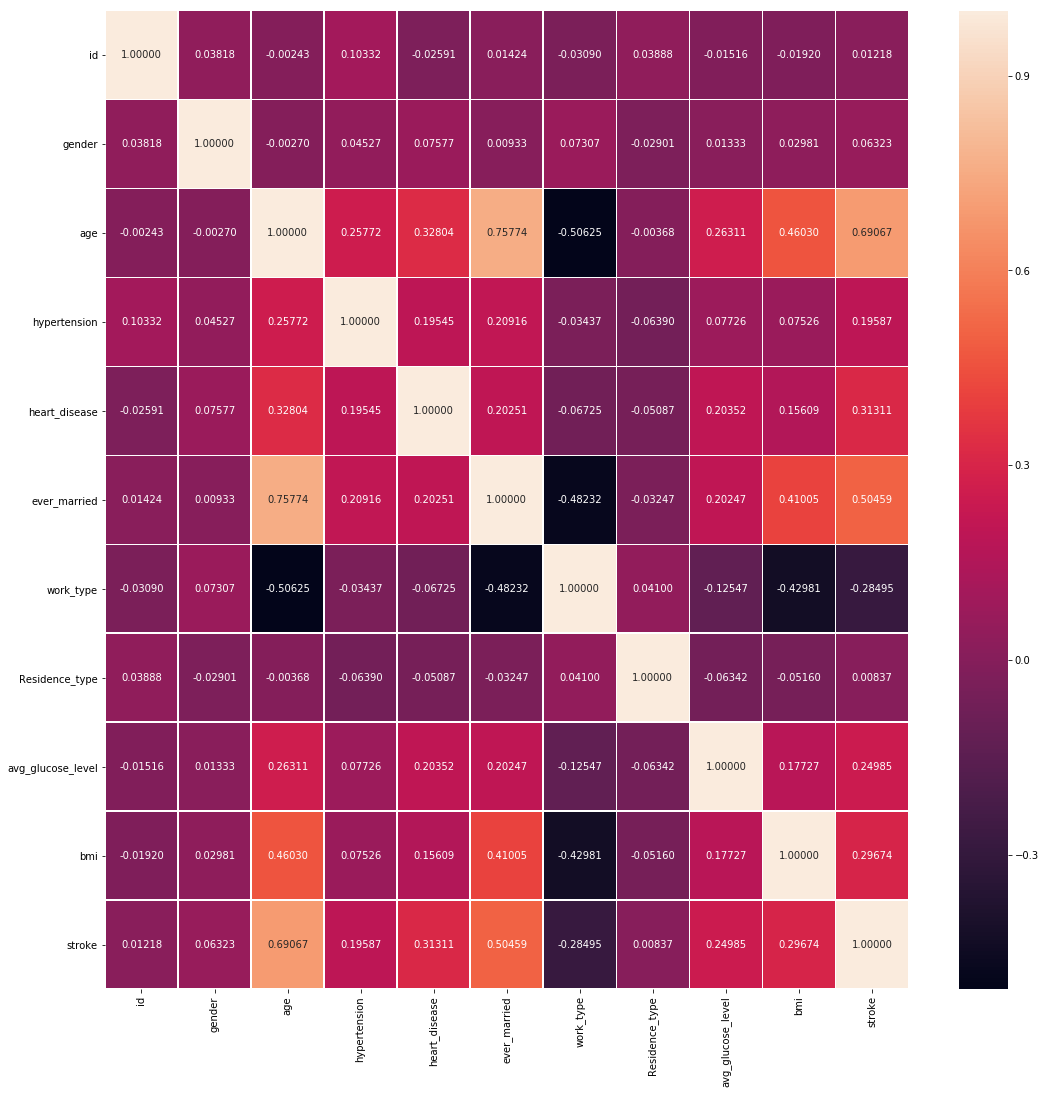

In [82]:
import seaborn as sns
os_data_X = pd.DataFrame(data=X_resampled_1,columns=['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi'] )
os_data_y= pd.DataFrame(data=y_resampled_1,columns=["stroke"])
df2 = pd.concat([os_data_X, os_data_y], axis=1)
# df2 = df.join(pd.DataFrame(tfidf_dense, columns=new_cols))
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df2.corr('pearson'), annot=True, linewidths=.5, fmt= '.5f',ax=ax)

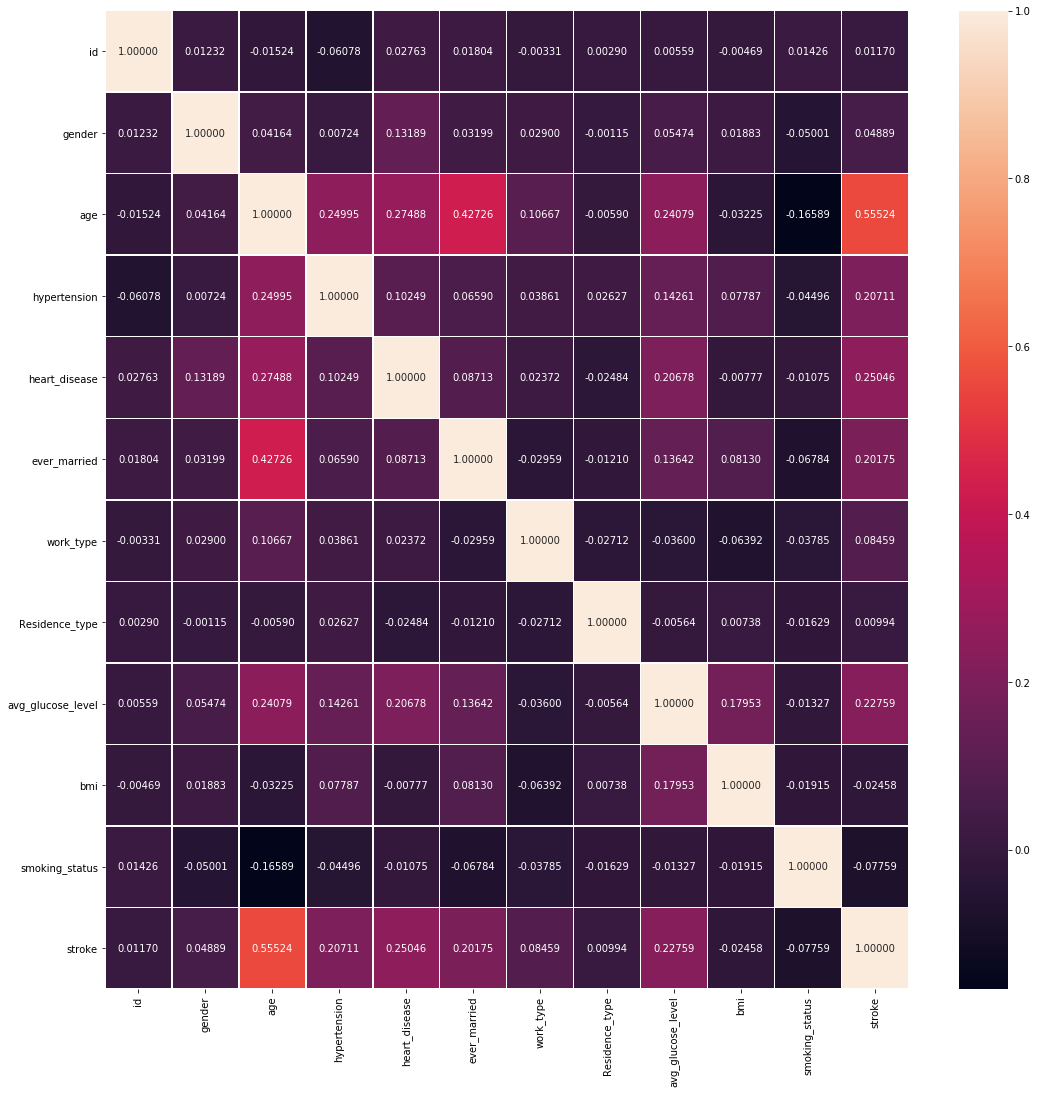

In [83]:
import seaborn as sns
os_data_X = pd.DataFrame(data=X_resampled,columns=['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status'] )
os_data_y= pd.DataFrame(data=y_resampled,columns=["stroke"])
df2 = pd.concat([os_data_X, os_data_y], axis=1)
# df2 = df.join(pd.DataFrame(tfidf_dense, columns=new_cols))
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df2.corr('pearson'), annot=True, linewidths=.5, fmt= '.5f',ax=ax)

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2)
print("With SMOKE_STATUS Training Data: ",X_train.shape)
print("With SMOKE_STATUS Testing Data: ",X_test.shape)

With SMOKE_STATUS Training Data:  (47152, 11)
With SMOKE_STATUS Testing Data:  (11788, 11)


In [90]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_resampled_1,y_resampled_1,test_size=0.2)
print("Without SMOKE_STATUS Training Data: ",X_train_1.shape)
print("Without SMOKE_STATUS Testing Data: ",X_test_1.shape)

Without SMOKE_STATUS Training Data:  (21035, 10)
Without SMOKE_STATUS Testing Data:  (5259, 10)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5967
           1       0.98      1.00      0.99      5821

   micro avg       0.99      0.99      0.99     11788
   macro avg       0.99      0.99      0.99     11788
weighted avg       0.99      0.99      0.99     11788

0.9881235154394299
[[5827  140]
 [   0 5821]]
precision =  0.9765140077168261 
 recall =  1.0


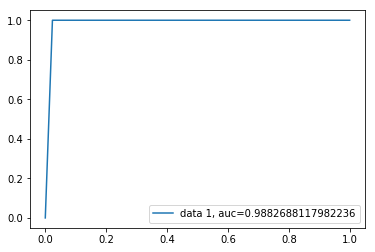

                   Importance
age                  0.374891
avg_glucose_level    0.191487
id                   0.160429
bmi                  0.151502
smoking_status       0.033065
heart_disease        0.020710
work_type            0.016997
gender               0.015556
Residence_type       0.012539
hypertension         0.012166
ever_married         0.010658


In [100]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

pred = dtree.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

impFeatures = pd.DataFrame(dtree.feature_importances_ ,index=train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

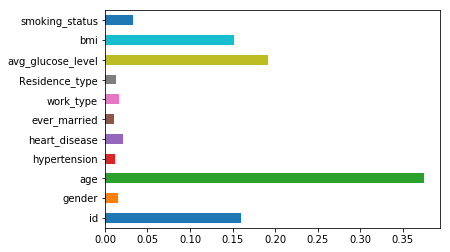

In [102]:
feat_importances = pd.Series(dtree.feature_importances_, index=train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'].columns)
feat_importances.plot(kind='barh')

In [82]:
feature_cols=['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

In [91]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\mkahs\\Anaconda3\\Library\\bin\\graphviz'
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('stroke1.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.76553 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.76553 to fit



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2654
           1       0.99      1.00      0.99      2605

   micro avg       0.99      0.99      0.99      5259
   macro avg       0.99      0.99      0.99      5259
weighted avg       0.99      0.99      0.99      5259

Accuracy: 0.9935348925651265
COnfusion Matrix: 
 [[2620   34]
 [   0 2605]]
precision =  0.9871163319439181 
 recall =  1.0
                   Importance
age                  0.569619
bmi                  0.155612
avg_glucose_level    0.118849
id                   0.098670
ever_married         0.014693
Residence_type       0.012557
work_type            0.012539
gender               0.010642
hypertension         0.005988
heart_disease        0.000830


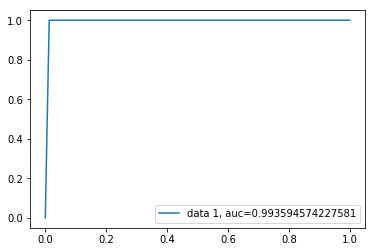

In [98]:
dtree_nosmoke = DecisionTreeClassifier()
dtree_nosmoke.fit(X_train_1,y_train_1)

pred = dtree_nosmoke.predict(X_test_1)
print(classification_report(y_test_1,pred))
print ('Accuracy: {}'.format(accuracy_score(y_test_1,pred)))
print ('COnfusion Matrix: \n {}'.format(confusion_matrix(y_test_1,pred)))

precision = precision_score(y_test_1,pred)
recall = recall_score(y_test_1,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = dtree_nosmoke.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba)
auc = roc_auc_score(y_test_1, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
# plt.show()

impFeatures = pd.DataFrame(dtree_nosmoke.feature_importances_ ,index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

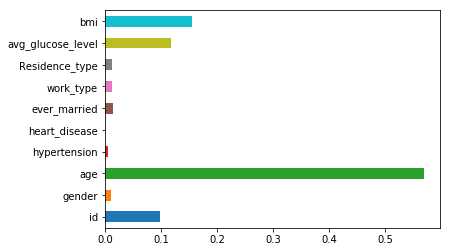

In [99]:
feat_importances = pd.Series(dtree_nosmoke.feature_importances_, index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns)
feat_importances.plot(kind='barh')

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

C:\Users\mkahs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.78      0.72      0.75      5967
           1       0.74      0.79      0.76      5821

   micro avg       0.76      0.76      0.76     11788
   macro avg       0.76      0.76      0.76     11788
weighted avg       0.76      0.76      0.76     11788

0.7565320665083135
[[4318 1649]
 [1221 4600]]
precision =  0.7361177788446152 
 recall =  0.790242226421577


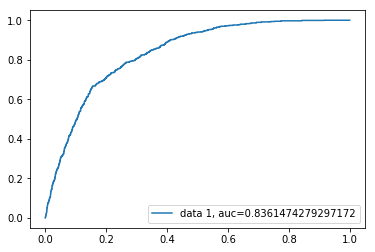

                   Importance
heart_disease        0.719415
hypertension         0.461239
Residence_type       0.089736
age                  0.071499
gender               0.059154
smoking_status       0.056409
work_type            0.017323
avg_glucose_level    0.004022
id                   0.000002
bmi                 -0.009144
ever_married        -0.035799


In [95]:
log = LogisticRegression(penalty='l2', C=0.1)
log.fit(X_train,y_train)

pred = log.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = log.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
impFeatures = pd.DataFrame(log.coef_[0] ,index=train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

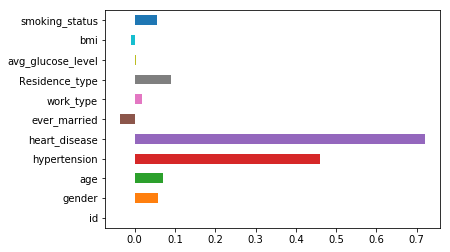

In [97]:
feat_importances = pd.Series(log.coef_[0], index=train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'].columns)
feat_importances.plot(kind='barh')

C:\Users\mkahs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.80      0.84      2654
           1       0.81      0.88      0.85      2605

   micro avg       0.84      0.84      0.84      5259
   macro avg       0.84      0.84      0.84      5259
weighted avg       0.84      0.84      0.84      5259

0.840844266970907
[[2128  526]
 [ 311 2294]]
precision =  0.8134751773049645 
 recall =  0.8806142034548944


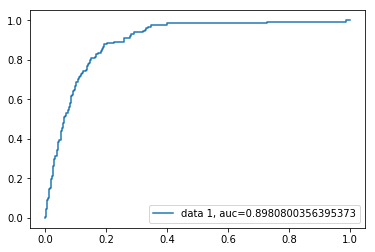

                   Importance
heart_disease        0.787246
gender               0.389984
Residence_type       0.103718
age                  0.071450
ever_married         0.051402
avg_glucose_level    0.003301
id                   0.000002
work_type           -0.003175
bmi                 -0.010906
hypertension        -0.053137


In [93]:
logg = LogisticRegression(penalty='l2', C=0.1)
logg.fit(X_train_1,y_train_1)

pred = logg.predict(X_test_1)
print(classification_report(y_test_1,pred))
print (accuracy_score(y_test_1,pred))
print (confusion_matrix(y_test_1,pred))

precision = precision_score(y_test_1,pred)
recall = recall_score(y_test_1,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = logg.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba)
auc = roc_auc_score(y_test_1, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

impFeatures = pd.DataFrame(logg.coef_[0] ,index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

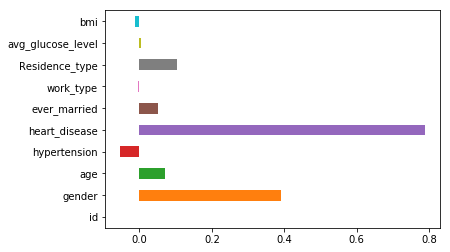

In [94]:
feat_importances = pd.Series(logg.coef_[0], index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns)
feat_importances.plot(kind='barh')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2645
           1       1.00      1.00      1.00      2614

   micro avg       1.00      1.00      1.00      5259
   macro avg       1.00      1.00      1.00      5259
weighted avg       1.00      1.00      1.00      5259

0.999239399125309
[[2641    4]
 [   0 2614]]
precision =  0.998472116119175 
 recall =  1.0


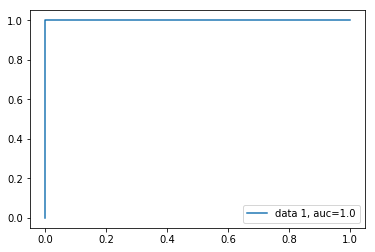

                   Importance
age                  0.360836
bmi                  0.171840
avg_glucose_level    0.120241
id                   0.100361
work_type            0.092755
ever_married         0.077271
heart_disease        0.029577
gender               0.018292
Residence_type       0.015614
hypertension         0.013214


In [39]:
ran = RandomForestClassifier(n_estimators=50,random_state=0)
ran.fit(X_train_1,y_train_1)

pred = ran.predict(X_test_1)
print(classification_report(y_test_1,pred))
print (accuracy_score(y_test_1,pred))
print (confusion_matrix(y_test_1,pred))

precision = precision_score(y_test_1,pred)
recall = recall_score(y_test_1,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = ran.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba)
auc = roc_auc_score(y_test_1, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


impFeatures = pd.DataFrame((ran.feature_importances_) ,index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

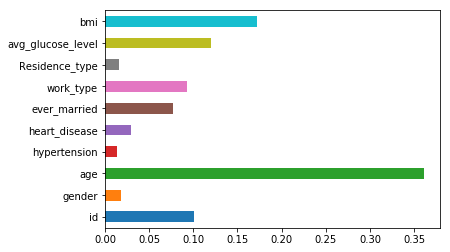

In [40]:
feat_importances = pd.Series(ran.feature_importances_, index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns)
feat_importances.plot(kind='barh')

In [41]:
test_data["bmi"]=test_data["bmi"].fillna(test_data["bmi"].mean())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5967
           1       1.00      1.00      1.00      5821

   micro avg       1.00      1.00      1.00     11788
   macro avg       1.00      1.00      1.00     11788
weighted avg       1.00      1.00      1.00     11788

0.999660671869698
[[5963    4]
 [   0 5821]]
precision =  0.9993133047210301 
 recall =  1.0


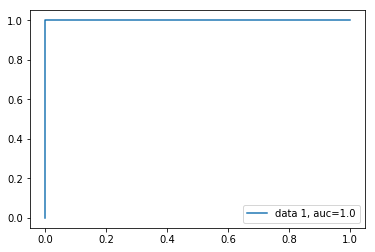

                   Importance
age                  0.339919
avg_glucose_level    0.180490
bmi                  0.152232
id                   0.150893
smoking_status       0.033227
work_type            0.031281
heart_disease        0.030238
hypertension         0.023594
Residence_type       0.021216
ever_married         0.019184
gender               0.017727


In [91]:
ran = RandomForestClassifier(n_estimators=50,random_state=0)
ran.fit(X_train,y_train)

pred = ran.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = ran.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


impFeatures = pd.DataFrame((ran.feature_importances_) ,index=train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

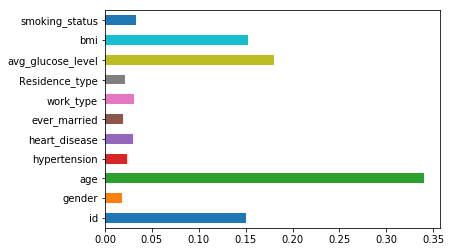

In [92]:
feat_importances = pd.Series(ran.feature_importances_, index=train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'].columns)
feat_importances.plot(kind='barh')

In [42]:
test_data.drop(axis=1,columns=['smoking_status'],inplace=True)

In [43]:
label = LabelEncoder()
test_data['gender'] = label.fit_transform(test_data['gender'])
test_data['ever_married'] = label.fit_transform(test_data['ever_married'])
test_data['work_type']= label.fit_transform(test_data['work_type'])
test_data['Residence_type']= label.fit_transform(test_data['Residence_type'])
pred = ran.predict(test_data)

In [44]:
prediction = pd.DataFrame(pred,columns=['Pred'])

In [45]:
prediction['Pred'].value_counts()

0    18590
1       11
Name: Pred, dtype: int64